In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.subplots as sp
import altair as alt
import random
from IPython.display import display, HTML
from matplotlib.colors import LinearSegmentedColormap
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
import matplotlib.font_manager as fm

# 한글 폰트 설정
plt.rcParams['font.family'] = 'AppleGothic'

# 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

In [3]:
# Data types and non-null counts
df=pd.read_csv("/kaggle/input/nfl-big-data-bowl-2025/games.csv")
print("Data types and non-null counts:\n", df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   gameId             136 non-null    int64 
 1   season             136 non-null    int64 
 2   week               136 non-null    int64 
 3   gameDate           136 non-null    object
 4   gameTimeEastern    136 non-null    object
 5   homeTeamAbbr       136 non-null    object
 6   visitorTeamAbbr    136 non-null    object
 7   homeFinalScore     136 non-null    int64 
 8   visitorFinalScore  136 non-null    int64 
dtypes: int64(5), object(4)
memory usage: 9.7+ KB
Data types and non-null counts:
 None


| 변수명             | 설명                                   |
|--------------------|----------------------------------------|
| gameId            | 경기 식별자 (고유, 숫자형)            |
| season            | 경기 시즌                             |
| week              | 경기 주차                             |
| gameDate          | 경기 날짜 (MM/DD/YYYY)                |
| gameTimeEastern   | 경기 시작 시간 (HH:MM:SS, EST 기준)   |
| homeTeamAbbr      | 홈팀 약어                             |
| visitorTeamAbbr   | 원정팀 약어                           |
| homeFinalScore    | 홈팀 최종 점수                        |
| visitorFinalScore | 원정팀 최종 점수                      |

In [4]:
# Unique gameId 중복값 확인
print("Unique game IDs:", df['gameId'].nunique())

Unique game IDs: 136


info와 nunique()를 비교해본 결과, 값이 일치함 -> 중복값 없음

In [5]:
# 날짜 데이터 변환
df['gameDate'] = pd.to_datetime(df['gameDate'], format='%m/%d/%Y')
df['gameTimeEastern'] = pd.to_datetime(df['gameTimeEastern'], format='%H:%M:%S').dt.time

print(df.info())
print(df.head(15))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   gameId             136 non-null    int64         
 1   season             136 non-null    int64         
 2   week               136 non-null    int64         
 3   gameDate           136 non-null    datetime64[ns]
 4   gameTimeEastern    136 non-null    object        
 5   homeTeamAbbr       136 non-null    object        
 6   visitorTeamAbbr    136 non-null    object        
 7   homeFinalScore     136 non-null    int64         
 8   visitorFinalScore  136 non-null    int64         
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 9.7+ KB
None
        gameId  season  week   gameDate gameTimeEastern homeTeamAbbr  \
0   2022090800    2022     1 2022-09-08        20:20:00           LA   
1   2022091100    2022     1 2022-09-11        13:00:00          ATL   
2

In [6]:
# 시즌별 경기 수 확인
df['season'].value_counts()


season
2022    136
Name: count, dtype: int64

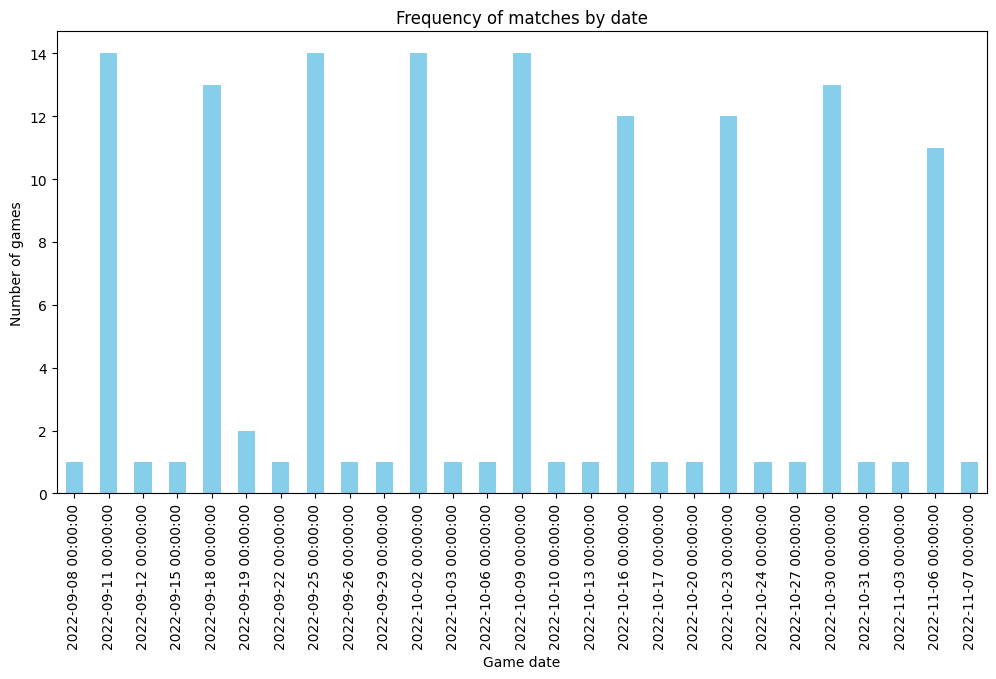

In [7]:
# 날짜별 경기 수 확인
date_counts = df['gameDate'].value_counts().sort_index()

# 시각화
plt.figure(figsize=(12, 6))
date_counts.plot(kind='bar', color='skyblue')
plt.title('Frequency of matches by date')
plt.xlabel('Game date')
plt.ylabel('Number of games')
plt.show()

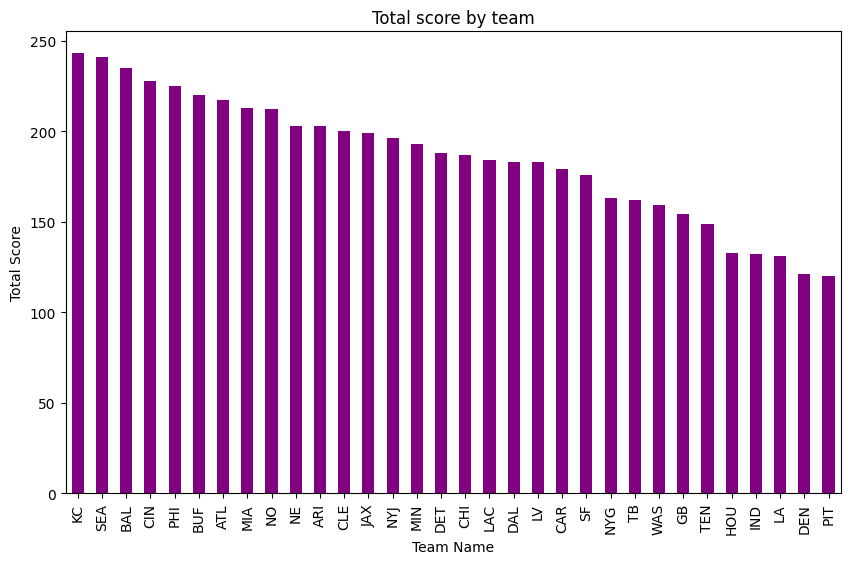

In [8]:
# 팀별 총 득점 계산
home_scores = df.groupby('homeTeamAbbr')['homeFinalScore'].sum()
visitor_scores = df.groupby('visitorTeamAbbr')['visitorFinalScore'].sum()

# 홈/원정 점수 합산
total_scores = home_scores.add(visitor_scores, fill_value=0).sort_values(ascending=False)

# 시각화
plt.figure(figsize=(10, 6))
total_scores.plot(kind='bar', color='purple')
plt.title('Total score by team')
plt.xlabel('Team Name')
plt.ylabel('Total Score')
plt.show()

- 홈과 원정에서 진행한 경기를 모두 포함한 총 득점을 구해본 결과, KC, SEA, BAL, CIN, PHI 팀이 득점력이 높은 상위 5개 팀이다.
- 5개의 팀은 홈에서 많은 점수를 획득했을까, 원정에서 많은 점수를 획득했을까?
- 이 팀들이 많은 득점을 올린 결과, 얼마나 많은 경기에서 이겼을까?

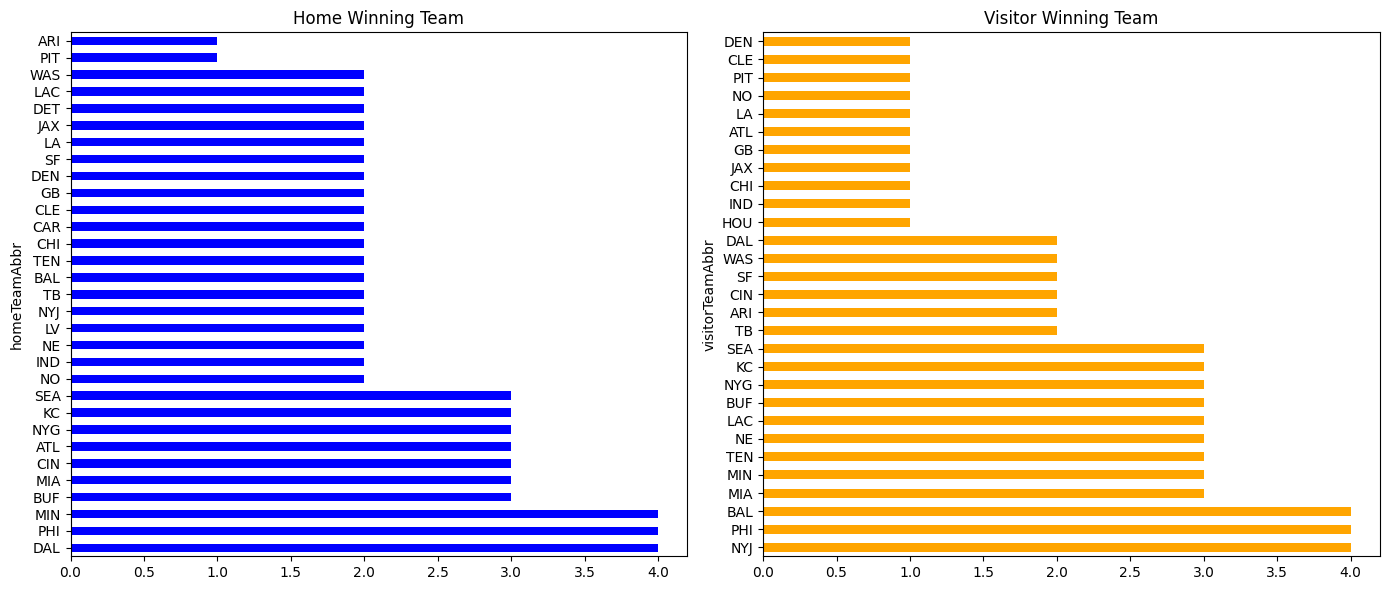

In [9]:
# 홈팀과 원정팀 승리 여부 계산
df['homeWin'] = df['homeFinalScore'] > df['visitorFinalScore']
df['visitorWin'] = df['visitorFinalScore'] > df['homeFinalScore']

# 홈에서 많이 이긴 팀
home_wins = df[df['homeWin']]['homeTeamAbbr'].value_counts()

# 원정에서 많이 이긴 팀
visitor_wins = df[df['visitorWin']]['visitorTeamAbbr'].value_counts()

# 시각화
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
home_wins.plot(kind='barh', ax=ax[0], color='blue', title='Home Winning Team')
visitor_wins.plot(kind='barh', ax=ax[1], color='orange', title='Visitor Winning Team')
plt.tight_layout()
plt.show()

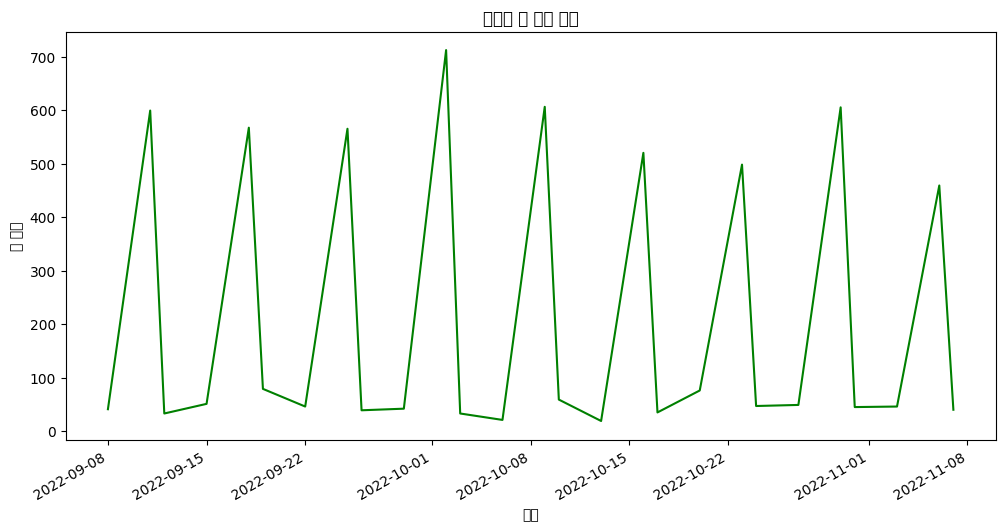

In [10]:
# 날짜별 점수 합산
df['totalScore'] = df['homeFinalScore'] + df['visitorFinalScore']
daily_scores = df.groupby('gameDate')['totalScore'].sum()

# 시각화
plt.figure(figsize=(12, 6))
daily_scores.plot(kind='line', color='green')
plt.title('날짜별 총 득점 추세')
plt.xlabel('날짜')
plt.ylabel('총 득점')
plt.show()

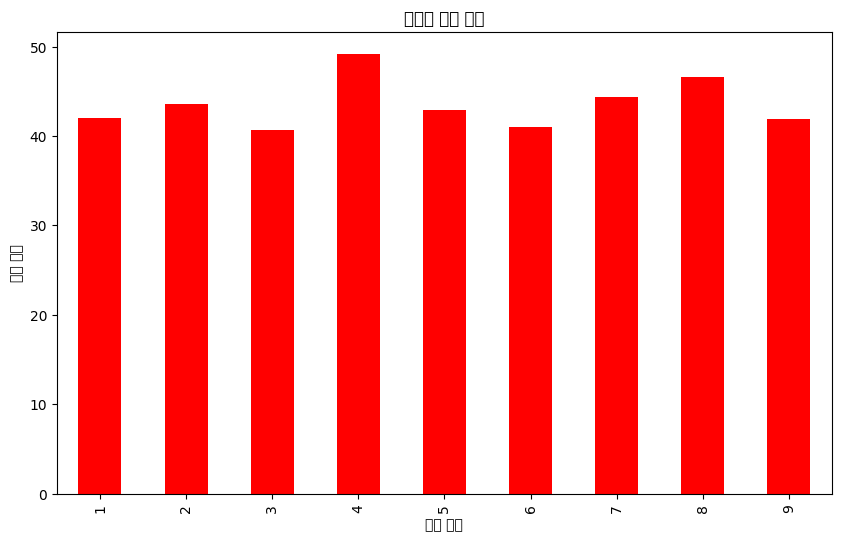

In [11]:
# 주차별 평균 점수 계산
weekly_scores = df.groupby('week')['totalScore'].mean()

# 시각화
plt.figure(figsize=(10, 6))
weekly_scores.plot(kind='bar', color='red')
plt.title('주차별 평균 점수')
plt.xlabel('경기 주차')
plt.ylabel('평균 점수')
plt.show()

In [12]:
min_gameid=df["gameId"].min()
print("The Minimum Game id of the players according to this Dataset is:", min_gameid)
max_gameid=df["gameId"].max()
print("The Maximum Game id of the players according to this Dataset is:", max_gameid)

The Minimum Game id of the players according to this Dataset is: 2022090800
The Maximum Game id of the players according to this Dataset is: 2022110700


In [13]:
min_season=df["season"].min()
print("The Minimum Game season for the players according to this Dataset is:", min_season)
max_season=df["season"].max()
print("The Maximum Game season for the players according to this Dataset is:", max_season)

The Minimum Game season for the players according to this Dataset is: 2022
The Maximum Game season for the players according to this Dataset is: 2022


In [14]:
# Get the unique seasons and teams
unique_seasons = df['season'].unique()
unique_teams = df['homeTeamAbbr'].unique()

# Get the first and last game dates
first_game_date = df['gameDate'].min()  # Assuming 'gameDate' column contains the game date
last_game_date = df['gameDate'].max()

# Print the first and last game dates
print("The data spans from the first game on", first_game_date, "to the last game on", last_game_date)

The data spans from the first game on 2022-09-08 00:00:00 to the last game on 2022-11-07 00:00:00


In [15]:
# 홈 팀이 이긴 경기
home_wins = df[df['homeFinalScore'] > df['visitorFinalScore']]

# 방문 팀이 이긴 경기
visitor_wins = df[df['homeFinalScore'] < df['visitorFinalScore']]

# 홈 팀과 방문 팀 각각의 승리 횟수 계산
home_win_counts = home_wins['homeTeamAbbr'].value_counts()
visitor_win_counts = visitor_wins['visitorTeamAbbr'].value_counts()

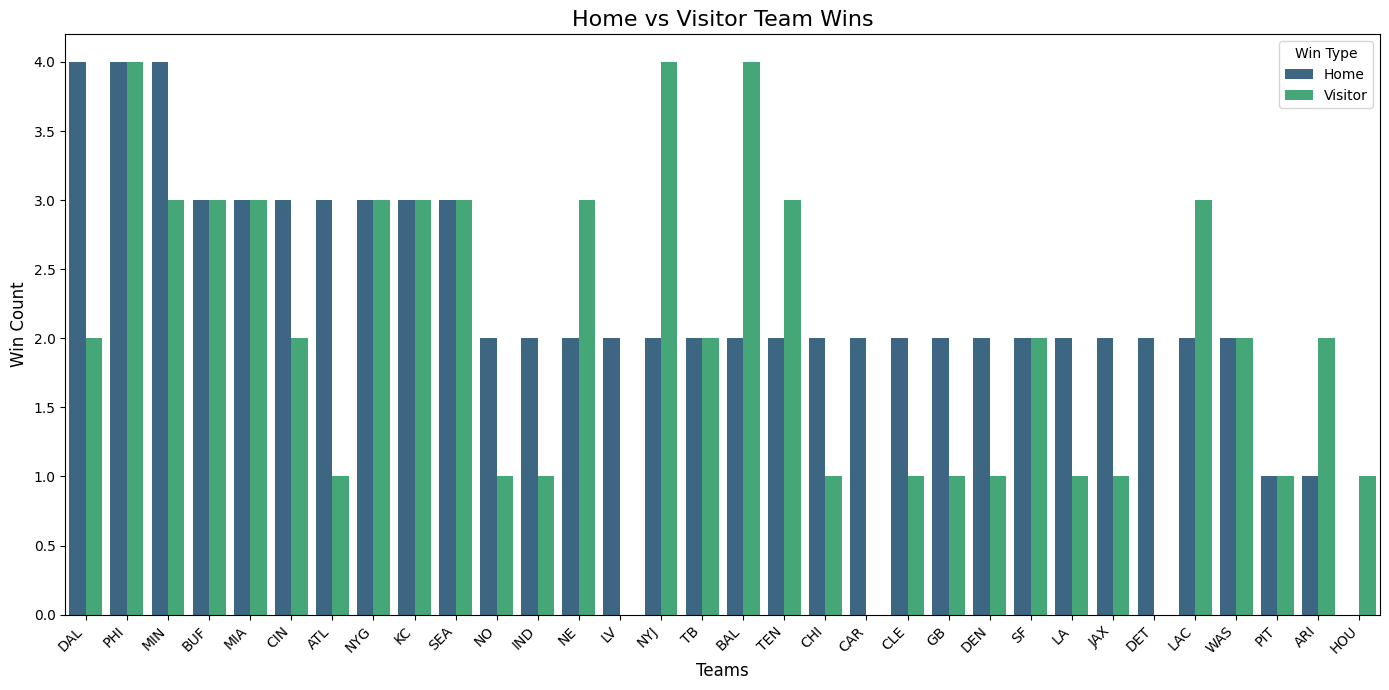

In [16]:
# 데이터를 하나의 데이터프레임으로 병합
home_win_df = pd.DataFrame({'Team': home_win_counts.index, 'Wins': home_win_counts.values, 'Type': 'Home'})
visitor_win_df = pd.DataFrame({'Team': visitor_win_counts.index, 'Wins': visitor_win_counts.values, 'Type': 'Visitor'})
win_data = pd.concat([home_win_df, visitor_win_df])

# 시각화
plt.figure(figsize=(14, 7))
sns.barplot(x='Team', y='Wins', hue='Type', data=win_data, palette='viridis')

# 그래프 꾸미기
plt.title('Home vs Visitor Team Wins', fontsize=16)
plt.xlabel('Teams', fontsize=12)
plt.ylabel('Win Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Win Type')

# 출력
plt.tight_layout()
plt.show()